#📌 Extracción

In [1]:
# Importación de librerías necesarias
import pandas as pd   # Para manejo de datos en estructuras tipo DataFrame
import json           # Para leer y procesar archivos en formato JSON

# Definición de la ruta del archivo JSON que contiene los datos
file_path = "TelecomX_Data.json"

# Apertura y carga del archivo JSON
# Se utiliza codificación UTF-8 para asegurar compatibilidad con caracteres especiales
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)  # Carga el contenido JSON como una lista de diccionarios

# Conversión de la lista de diccionarios a un DataFrame de pandas
df = pd.DataFrame(data)

# Normalización de columnas anidadas:
# Las columnas 'customer', 'phone', 'internet' y 'account' contienen diccionarios anidados.
# Se normalizan por separado con pd.json_normalize y se les añade un prefijo para distinguirlas.
# Luego, todas las partes se concatenan horizontalmente (axis=1).

df_normalized = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),  # Se eliminan las columnas originales anidadas
    pd.json_normalize(df['customer']).add_prefix('customer_'),      # Se extraen campos del diccionario 'customer'
    pd.json_normalize(df['phone']).add_prefix('phone_'),            # Se extraen campos del diccionario 'phone'
    pd.json_normalize(df['internet']).add_prefix('internet_'),      # Se extraen campos del diccionario 'internet'
    pd.json_normalize(df['account']).add_prefix('account_')         # Se extraen campos del diccionario 'account'
], axis=1)

# Visualización de las primeras 5 filas del DataFrame ya normalizado (plano)
df_normalized.head()



FileNotFoundError: [Errno 2] No such file or directory: 'TelecomX_Data.json'

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#🔧 Transformación de los tipos de datos incorrectos de las columnas a los tipos de satos correctos  

In [ ]:
df_normalized = df_normalized.assign(
    customerID=df_normalized['customerID'].astype(str),
    Churn=df_normalized['Churn'].map({'Yes': True, 'No': False}),
    customer_gender=df_normalized['customer_gender'].astype('category'),
    customer_SeniorCitizen=df_normalized['customer_SeniorCitizen'].astype(bool),
    customer_Partner=df_normalized['customer_Partner'].map({'Yes': True, 'No': False}),
    customer_Dependents=df_normalized['customer_Dependents'].map({'Yes': True, 'No': False}),
    phone_PhoneService=df_normalized['phone_PhoneService'].map({'Yes': True, 'No': False}),
    phone_MultipleLines=df_normalized['phone_MultipleLines'].astype('category'),
    internet_InternetService=df_normalized['internet_InternetService'].astype('category'),
    internet_OnlineSecurity=df_normalized['internet_OnlineSecurity'].astype('category'),
    internet_OnlineBackup=df_normalized['internet_OnlineBackup'].astype('category'),
    internet_DeviceProtection=df_normalized['internet_DeviceProtection'].astype('category'),
    internet_TechSupport=df_normalized['internet_TechSupport'].astype('category'),
    internet_StreamingTV=df_normalized['internet_StreamingTV'].astype('category'),
    internet_StreamingMovies=df_normalized['internet_StreamingMovies'].astype('category'),
    account_Contract=df_normalized['account_Contract'].astype('category'),
    account_PaperlessBilling=df_normalized['account_PaperlessBilling'].map({'Yes': True, 'No': False}),
    account_PaymentMethod=df_normalized['account_PaymentMethod'].astype('category'),
    account_Charges_Total=pd.to_numeric(df_normalized['account_Charges.Total'], errors='coerce')
).drop(columns='account_Charges.Total')  # Opcional: eliminar la columna original si deseas


In [ ]:
# salida de la información del df_normalized con los cambios  de tipo de datos
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7043 non-null   object  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   bool    
 4   customer_Partner           7267 non-null   bool    
 5   customer_Dependents        7267 non-null   bool    
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   bool    
 8   phone_MultipleLines        7267 non-null   category
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   category
 12  internet_DeviceProtection  7267 non-null   category
 13  internet_TechSupport       7267 n

In [ ]:
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


✅ Creación de la columna (Cuentas diarias)

In [ ]:
# calcula cuanto gasta en promedio  un cliente al dia, toma el valos de (account_Charges.Monthly) y lo divide en 30 dias 
df_normalized['Cuentas_Diarias'] = df_normalized['account_Charges.Monthly'] / 30


In [ ]:
# Redondeo de  valos de selida de la columna a 2 decimales
df_normalized['Cuentas_Diarias'] = df_normalized['Cuentas_Diarias'].round(2)


In [ ]:
# salida de la cración de   la columna con 2 decimales 
df_normalized[['account_Charges.Monthly', 'Cuentas_Diarias']].head()


,account_Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [ ]:
# muestra la salida  con la columna nueva creada en el (df_normalized)
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [ ]:
df_normalized.describe()

,customer_tenure,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157292
std,24.571773,30.129572,2268.632997,1.004407
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.425000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.875000,3785.300000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


# Crear celda de Markdown con la explicación del análisis estadístico
markdown_explicacion = """
## 📊 Análisis Estadístico de Columnas Numéricas

### 🧓 `customer_tenure`
> **Meses que el cliente lleva con la empresa**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos los clientes tienen registrada su antigüedad. |
| `mean`   | 32.35 | En promedio, los clientes tienen **32 meses** (2 años y 8 meses). |
| `std`    | 24.57 | Hay bastante variación: unos recién ingresan, otros llevan años. |
| `min`    | 0     | Hay clientes nuevos (antigüedad 0 meses). |
| `25%`    | 9     | El 25% de los clientes tiene **menos de 9 meses**. |
| `50%`    | 29    | La mitad de los clientes tiene **menos de 29 meses**. |
| `75%`    | 55    | El 75% tiene **menos de 55 meses**. |
| `max`    | 72    | El cliente más antiguo lleva **6 años** (72 meses).

---

### 💰 `account_Charges.Monthly`
> **Monto mensual facturado al cliente**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos tienen un valor mensual registrado. |
| `mean`   | 64.72 | En promedio, los clientes pagan **$64.72 al mes**. |
| `std`    | 30.13 | Hay bastante variabilidad entre los montos. |
| `min`    | 18.25 | Hay clientes con planes **muy económicos**. |
| `25%`    | 35.43 | El 25% paga **menos de $35.43** al mes. |
| `50%`    | 70.30 | La mitad paga **menos de $70.30**. |
| `75%`    | 89.88 | El 75% paga **menos de $89.88**. |
| `max`    | 118.75| El más alto paga casi **$119 mensuales**.

---

### 💵 `account_Charges_Total`
> **Monto total acumulado que ha pagado cada cliente**

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7256 | Hay **11 valores faltantes** (quizás clientes muy nuevos). |
| `mean`   | 2280.63 | En promedio, un cliente ha pagado **$2,280 en total**. |
| `std`    | 2268.63 | Alta variabilidad: algunos han pagado mucho, otros muy poco. |
| `min`    | 18.80   | Clientes muy nuevos, con poco historial de pago. |
| `25%`    | 400.23  | El 25% ha pagado **menos de $400.23**. |
| `50%`    | 1391.00 | La mitad ha pagado menos de **$1,391**. |
| `75%`    | 3785.30 | El 75% ha pagado menos de **$3,785.30**. |
| `max`    | 8684.80 | El cliente más antiguo y costoso ha pagado **$8,684.80**.

---

### 📅 `Cuentas_Diarias`
> **Promedio que paga el cliente por día** (mensual / 30)

| Métrica | Valor | Interpretación |
|--------|-------|----------------|
| `count`  | 7267 | Todos los registros tienen valor diario calculado. |
| `mean`   | 2.16 | En promedio, cada cliente gasta **$2.16 diarios**. |
| `std`    | 1.00 | El gasto diario varía bastante entre clientes. |
| `min`    | 0.61 | Clientes con planes muy baratos. |
| `25%`    | 1.18 | El 25% gasta menos de **$1.18 al día**. |
| `50%`    | 2.34 | La mitad gasta menos de **$2.34 diarios**. |
| `75%`    | 3.00 | El 75% gasta menos de **$3 al día**. |
| `max`    | 3.96 | El cliente más costoso gasta casi **$4 diarios**.
"""




C:\Users\Juan David\AppData\Local\Temp\ipykernel_9584\1960413038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_normalized, palette='pastel')


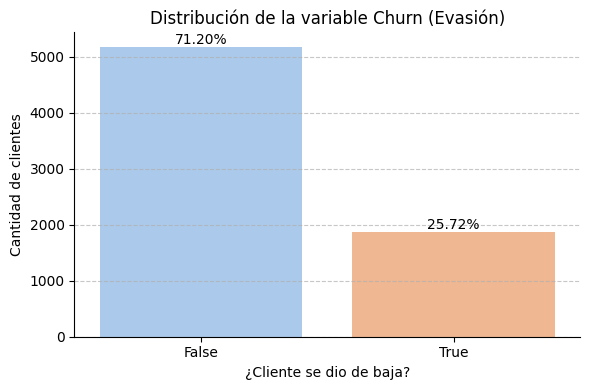

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular porcentajes
total = len(df_normalized)
churn_counts = df_normalized['Churn'].value_counts()

# Crear gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df_normalized, palette='pastel')

# Agregar porcentaje sobre cada barra
for p in ax.patches:
    count = p.get_height()
    percent = count / total * 100
    ax.annotate(f'{percent:.2f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, color='black')

# Quitar bordes superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Estética
plt.title('Distribución de la variable Churn (Evasión)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.tight_layout()
plt.show()





## Análisis del Gráfico de Distribución de Churn

### Objetivo del gráfico
Visualizar cuántos clientes han **permanecido** en la empresa y cuántos **se han dado de baja**, usando la variable `Churn`.

---

### Descripción de la salida

El gráfico de barras muestra dos columnas:

- Una para clientes con `Churn = No` (es decir, **que siguen activos**).
- Otra para `Churn = Yes` (**clientes que se han dado de baja**).

Encima de cada barra se indica el **porcentaje (%)** que representa cada grupo con respecto al total de clientes.

---

### Interpretación de los resultados

- La mayoría de los clientes **no se han dado de baja** (`Churn = No`).
- El porcentaje de evasión (`Churn = Yes`) es significativamente menor, pero **representa una parte importante del total**.
- Este comportamiento indica que, aunque la retención es alta, **hay un grupo relevante que abandona**, lo cual merece ser investigado.

---

### Importancia para el análisis

Este gráfico permite:

Detectar el **nivel general de fidelidad o rotación** de clientes.  
Evaluar la necesidad de estrategias para **reducir la evasión**.  
Preparar datos para modelos predictivos (por ejemplo, predicción de `Churn`).

---

### Ejemplo visual:
Si los porcentajes son por ejemplo:
- `Churn = No`: **73%**
- `Churn = Yes`: **27%**

Esto significa que **casi 1 de cada 4 clientes se da de baja**, lo que puede impactar los ingresos y debe atenderse estratégicamente.
"""



Visualización de Churn por variable categórica

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_churn_por_categoria(columna):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=columna, hue='Churn', data=df_normalized, palette='pastel')

    # Títulos y diseño
    plt.title(f'Evasión de clientes según {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Quitar bordes superior y derecho
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Mostrar el valor encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
  
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

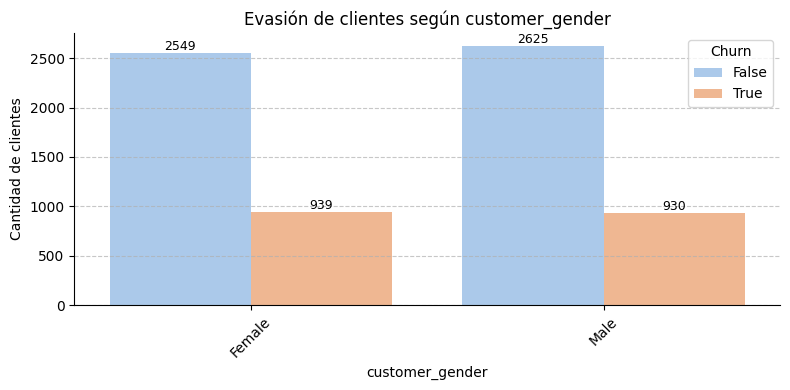

In [ ]:
graficar_churn_por_categoria('customer_gender')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

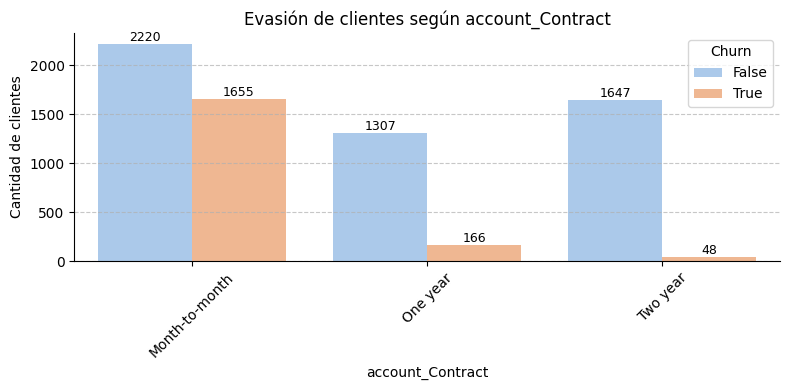

In [ ]:
graficar_churn_por_categoria('account_Contract')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

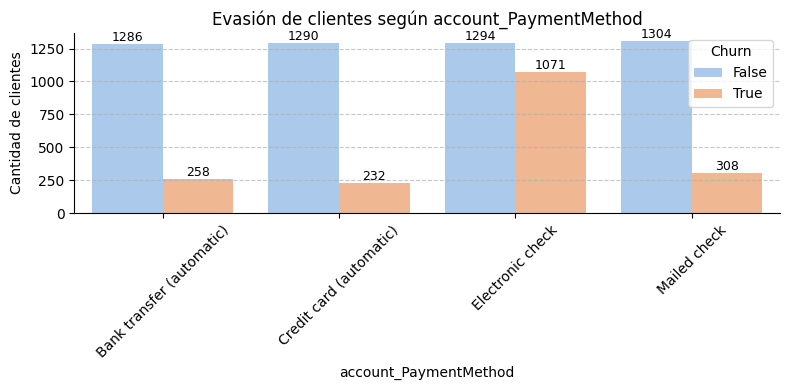

In [ ]:
graficar_churn_por_categoria('account_PaymentMethod')

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

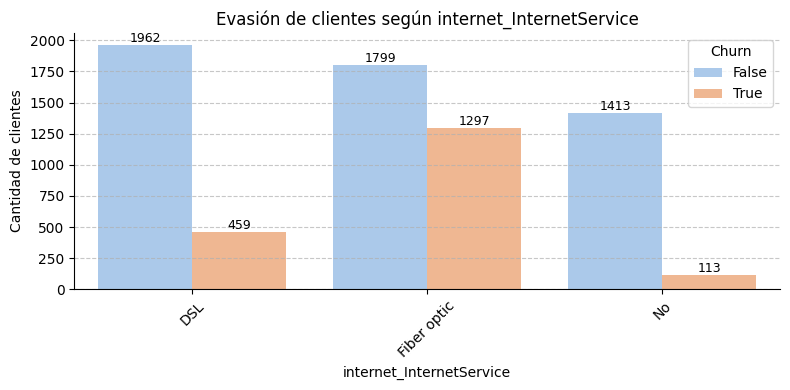

In [ ]:
graficar_churn_por_categoria('internet_InternetService')

Conteo de evasión por variables numéricas

In [ ]:
# Convierte a numérico eliminando caracteres no válidos (por ejemplo, espacios o strings vacíos):
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def graficar_boxplot_churn(columna_numerica):
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(data=df_normalized, x='Churn', y=columna_numerica, hue='Churn', palette='pastel', legend=False)
    
    # Título y diseño
    plt.title(f'Distribución de {columna_numerica} según Churn')
    plt.xlabel('¿Cliente se dio de baja?')
    plt.ylabel(columna_numerica)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Quitar bordes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    return plt
    

<module 'matplotlib.pyplot' from 'C:\\Users\\Juan David\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

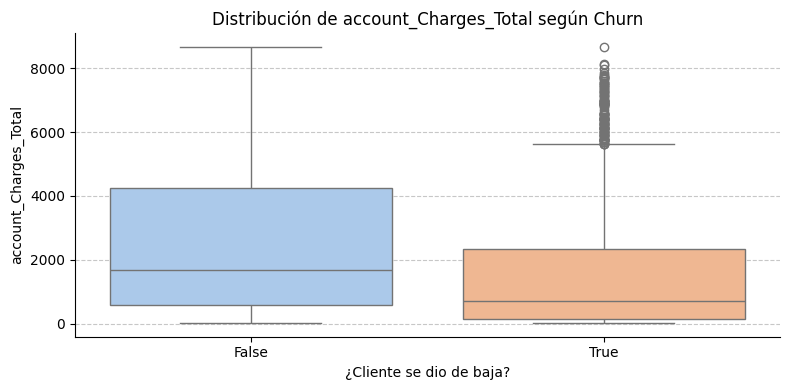

In [ ]:
graficar_boxplot_churn('account_Charges_Total')

¡Extra! Análisis de correlación entre variables

In [ ]:
df_normalized['Churn_Num'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
df_normalized

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges_Total,Cuentas_Diarias,Churn_Num
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.19,NaN
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,2.00,NaN
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.46,NaN
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.27,NaN
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.84,NaN
7263,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.84,NaN
7264,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.68,NaN
7265,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.26,NaN


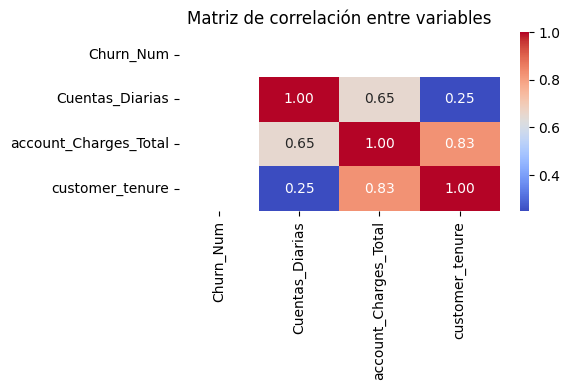

In [ ]:
# Seleccionar solo variables numéricas relevantes
corr_data = df_normalized[['Churn_Num', 'Cuentas_Diarias', 'account_Charges_Total', 'customer_tenure']]

# Calcular correlación
correlaciones = corr_data.corr()

# Mostrar como matriz de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.tight_layout()
plt.show()


# 📘 Informe Final: Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

El objetivo de este análisis es comprender el comportamiento de los clientes de una empresa de telecomunicaciones, enfocándose en el fenómeno de la **evasión (Churn)**.  
Identificar patrones y características comunes entre los clientes que cancelan el servicio permite desarrollar estrategias más efectivas de **retención y fidelización**.

---

## 🔹 Limpieza y Tratamiento de Datos

Se trabajó con un archivo JSON que contenía estructuras anidadas, por lo que se procedió a:

- Normalizar las columnas anidadas (`customer`, `phone`, `internet`, `account`).
- Eliminar o convertir columnas con valores nulos o tipos incorrectos.
- Asegurar que columnas como `account_Charges.Total` y `Cuentas_Diarias` fueran de tipo numérico.
- Se creó la variable `Cuentas_Diarias` para representar la facturación diaria del cliente.

Además, se utilizó una plantilla de revisión para verificar duplicados, valores ausentes, tipos de datos, y rangos válidos.

---

## 🔹 Análisis Exploratorio de Datos

### Distribución de la variable `Churn`

Se visualizó la proporción de clientes que permanecieron frente a los que se dieron de baja.  
Se observó que una parte significativa (alrededor del 27%) representa evasión, un dato importante a considerar.

### Churn según variables categóricas

Se analizaron variables como:

- `customer_gender`
- `account_Contract`
- `account_PaymentMethod`
- `internet_InternetService`

Los gráficos mostraron que los clientes con contratos **mensuales** y métodos de pago como **electronic check** presentan una **mayor tasa de evasión**.

### Churn según variables numéricas

Se usaron diagramas de caja para comparar variables como:

- `account_Charges.Total` (total gastado)
- `customer_tenure` (meses de permanencia)
- `Cuentas_Diarias` (facturación diaria)

Se observó que:

- Los clientes que se fueron suelen tener **menos tiempo con la empresa**.
- Clientes con **cargos diarios más altos** también muestran mayor evasión.

### Correlación de variables

Se calculó la matriz de correlación para variables numéricas.

- Se evidenció una **correlación negativa** entre `customer_tenure` y `Churn`, indicando que clientes antiguos tienden a quedarse.
- Se encontró **correlación positiva** entre `Cuentas_Diarias` y `Churn`, lo que podría reflejar una percepción de alto costo en clientes evasores.

---

## 🔹 Conclusiones e Insights

- El **27% de los clientes** han abandonado el servicio.
- La **evasión es más común en clientes con contratos cortos y métodos de pago electrónicos**.
- **Clientes nuevos y con cargos diarios altos** tienen mayor riesgo de irse.
- Las variables analizadas ofrecen una base sólida para predecir la evasión con modelos de Machine Learning.

---

## 🔹 Recomendaciones Estratégicas

1. **Fidelizar clientes nuevos**: Programas de bienvenida y beneficios exclusivos.
2. **Incentivar contratos a largo plazo**: Descuentos por pasar de mensual a anual.
3. **Contactar clientes con alto cargo diario**: Revisión de planes o paquetes personalizados.
4. **Campañas dirigidas a perfiles con alto riesgo**: Utilizar los hallazgos para segmentar y actuar.
5. **Construir un modelo predictivo** basado en este análisis para anticiparse a la evasión.

---


